<h1 align='center'  style="font-size:60px;">Average Joe's Gym</h1>
<h2 align='center'>Deloitte Analytics Hackathon</h2>
<img src='logo.jpg' align='center' style='height: 200px; width: auto;'>

<h1>Imports</h1>

In [490]:
#Imports
import pandas as pd    #Data Analysis
import matplotlib.pyplot as plt    #Plotting
import numpy as np    #Matrices
import seaborn as sns    #Visualisation
%matplotlib inline

fig = plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<h1>Load Data</h1>

In [491]:
Customer = pd.read_csv('Customer.csv', encoding = "ISO-8859-1")
Employee = pd.read_csv('Employee.csv', encoding = "ISO-8859-1")
Product = pd.read_csv('Product.csv', encoding = "ISO-8859-1")
Sales = pd.read_csv('Sales.csv', encoding = "ISO-8859-1")
Store = pd.read_csv('Store.csv', encoding = "ISO-8859-1")

<h3>Data Info</h3>

In [492]:
print("\nCustomer\n")
Customer.info()
print("\nEmployee\n")
Employee.info()
print("\nProduct\n")
Product.info()
print("\nSales\n")
Sales.info()
print("\nStore\n")
Store.info()


Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 7 columns):
CustomerID           547 non-null object
Customer             547 non-null object
Customer Province    547 non-null object
Age                  547 non-null int64
Race                 547 non-null object
Income Bracket       547 non-null object
Gender               547 non-null object
dtypes: int64(1), object(6)
memory usage: 30.0+ KB

Employee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
EmployeeID    150 non-null int64
Name          150 non-null object
Age           150 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.6+ KB

Product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 2 columns):
ProductID       1839 non-null object
Product Name    1839 non-null object
dtypes: object(2)
memory usage: 28.8+ KB

Sales

<class 'pandas.core.frame.DataFrame'>
RangeI

<h3>Descriptions</h3>

In [493]:
Sales.describe(include='all')

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost
count,56199,56199.000000,56199,56199,56199.000000,56199.000000,56199,56199.000000,56199.000000,56199.000000
unique,6,NaN,26565,547,NaN,NaN,1724,NaN,NaN,NaN
top,4/30/2018,NaN,12:50:46,2ENA,NaN,NaN,A1826,NaN,NaN,NaN
freq,14107,NaN,14,791,NaN,NaN,910,NaN,NaN,NaN
mean,NaN,15.379384,NaN,NaN,11.405701,71.326999,NaN,200.580355,26.385487,127.770717
std,NaN,8.591361,NaN,NaN,7.056722,44.316259,NaN,707.169783,79.239884,499.436184
min,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,0.000000,1.000000,0.000000
25%,NaN,8.000000,NaN,NaN,5.000000,30.000000,NaN,12.566000,2.000000,6.413000
50%,NaN,15.000000,NaN,NaN,12.000000,75.000000,NaN,56.598000,7.000000,34.334000
75%,NaN,23.000000,NaN,NaN,16.000000,103.000000,NaN,138.960000,21.000000,83.023000


In [494]:
Sales.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994


<h3>Pairplots</h3>

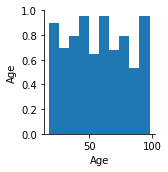

In [495]:
sns.pairplot(Customer)

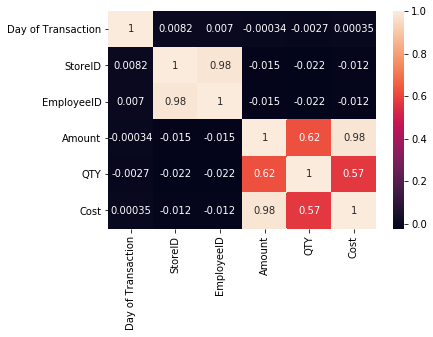

In [496]:
sns.heatmap(Sales.corr(),annot=True)

<h3>Joining Tables</h3>

In [497]:
Join2 = Sales.join(Customer.set_index('CustomerID'), on='CustomerID', rsuffix='_Customer')
Join3 = Join2.join(Employee.set_index('EmployeeID'), on='EmployeeID', lsuffix='_Customer', rsuffix='_Employee')
Join4 = Join3.join(Product.set_index('ProductID'), on='ProductID')
FullData = Join4.join(Store.set_index('StoreID'),on='StoreID')
FullData.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,...,Customer Province,Age_Customer,Race,Income Bracket,Gender,Name,Age_Employee,Product Name,Latitude,Longitude
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484,...,Western Cape,60,African,25 001 - 35 000,Female,Katia Tilman,45,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884,...,Western Cape,81,African,15 001 - 20 000,Female,Kaila Mcdougall,30,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394,...,Western Cape,98,African,25 001 - 35 000,Male,Paul Blackburn,25,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330,...,Mpumalanga,65,African,10 001 - 15 000,Male,Grisel Tomberlin,36,ORIENTAL SOY SAUCE - 16 OZ,-27.992459,26.775847
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994,...,Western Cape,64,African,50 001+,Female,Summer Dials,46,ORIENTAL SOY SAUCE - 16 OZ,-33.919628,18.385679


<h3>Plotting Categorical Data</h3>

In [498]:
FullData['Income Bracket'] = pd.Categorical(FullData['Income Bracket'])
#Customer['Income Bracket'] = Customer['Income Bracket'].cat.codes
dict( enumerate(FullData['Income Bracket'].cat.categories) )
#Customer.head()
#Customer['Income Bracket'].cat.codes
#sns.stripplot(x='Race',y='Income Bracket',data=CustomerTest,jitter=True)

{0: '0 - 5000',
 1: '10 001 - 15 000',
 2: '15 001 - 20 000',
 3: '20 001 - 25 000',
 4: '25 001 - 35 000',
 5: '35 001 - 50 000',
 6: '5 001 - 10 000',
 7: '50 001+'}

In [499]:
FullData.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,...,Customer Province,Age_Customer,Race,Income Bracket,Gender,Name,Age_Employee,Product Name,Latitude,Longitude
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484,...,Western Cape,60,African,25 001 - 35 000,Female,Katia Tilman,45,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884,...,Western Cape,81,African,15 001 - 20 000,Female,Kaila Mcdougall,30,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394,...,Western Cape,98,African,25 001 - 35 000,Male,Paul Blackburn,25,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330,...,Mpumalanga,65,African,10 001 - 15 000,Male,Grisel Tomberlin,36,ORIENTAL SOY SAUCE - 16 OZ,-27.992459,26.775847
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994,...,Western Cape,64,African,50 001+,Female,Summer Dials,46,ORIENTAL SOY SAUCE - 16 OZ,-33.919628,18.385679


In [500]:
FullData['Income Bracket'] = FullData['Income Bracket'].cat.codes
FullData.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,...,Customer Province,Age_Customer,Race,Income Bracket,Gender,Name,Age_Employee,Product Name,Latitude,Longitude
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484,...,Western Cape,60,African,4,Female,Katia Tilman,45,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884,...,Western Cape,81,African,2,Female,Kaila Mcdougall,30,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394,...,Western Cape,98,African,4,Male,Paul Blackburn,25,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330,...,Mpumalanga,65,African,1,Male,Grisel Tomberlin,36,ORIENTAL SOY SAUCE - 16 OZ,-27.992459,26.775847
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994,...,Western Cape,64,African,7,Female,Summer Dials,46,ORIENTAL SOY SAUCE - 16 OZ,-33.919628,18.385679


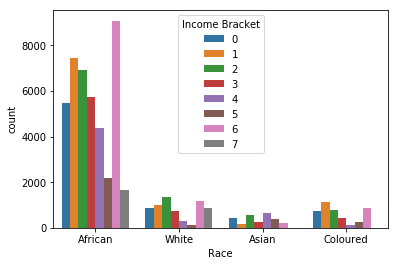

In [501]:
sns.countplot(x="Race", data=FullData, hue='Income Bracket')

In [502]:
FullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56199 entries, 0 to 56198
Data columns (total 21 columns):
Date Consolidated      56199 non-null object
Day of Transaction     56199 non-null int64
Time of Transaction    56199 non-null object
CustomerID             56199 non-null object
StoreID                56199 non-null int64
EmployeeID             56199 non-null int64
ProductID              56199 non-null object
Amount                 56199 non-null float64
QTY                    56199 non-null int64
Cost                   56199 non-null float64
Customer               56199 non-null object
Customer Province      56199 non-null object
Age_Customer           56199 non-null int64
Race                   56199 non-null object
Income Bracket         56199 non-null int8
Gender                 56199 non-null object
Name                   56199 non-null object
Age_Employee           56199 non-null int64
Product Name           56199 non-null object
Latitude               56199 non-null floa

In [503]:
FullData28 = FullData.loc[FullData['Day of Transaction'] == 28]
FullDataFeb28 = FullData28.loc[FullData28['Date Consolidated'].str.startswith('2')]

In [504]:
def displayAll(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df)



In [505]:
FullDataFeb28.describe(include='all')

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,...,Customer Province,Age_Customer,Race,Income Bracket,Gender,Name,Age_Employee,Product Name,Latitude,Longitude
count,572,572.0,572,572,572.000000,572.000000,572,572.000000,572.000000,572.000000,...,572,572.000000,572,572.000000,572,572,572.000000,572,572.000000,572.000000
unique,2,NaN,568,293,NaN,NaN,292,NaN,NaN,NaN,...,8,NaN,4,NaN,2,141,NaN,246,NaN,NaN
top,2/28/2017,NaN,12:25:29,2ENA,NaN,NaN,A1827,NaN,NaN,NaN,...,Gauteng Central,NaN,African,NaN,Female,Arlean Langone,NaN,FRZN SS PREMIUM ENTREES/DNRS/T - 14 OZ,NaN,NaN
freq,417,NaN,2,10,NaN,NaN,15,NaN,NaN,NaN,...,112,NaN,430,NaN,389,11,NaN,15,NaN,NaN
mean,NaN,28.0,NaN,NaN,11.396853,71.407343,NaN,346.445284,40.610140,222.466045,...,NaN,57.713287,NaN,3.066434,NaN,NaN,39.024476,NaN,-28.074818,26.554147
std,NaN,0.0,NaN,NaN,7.293559,45.341863,NaN,956.867771,89.603916,634.622934,...,NaN,22.620720,NaN,2.257300,NaN,NaN,9.385466,NaN,3.444398,3.682668
min,NaN,28.0,NaN,NaN,1.000000,1.000000,NaN,0.000000,1.000000,0.000000,...,NaN,18.000000,NaN,0.000000,NaN,NaN,22.000000,NaN,-34.022660,18.385679
25%,NaN,28.0,NaN,NaN,5.000000,31.000000,NaN,12.780000,2.000000,6.810500,...,NaN,40.000000,NaN,1.000000,NaN,NaN,31.000000,NaN,-29.123251,26.220607
50%,NaN,28.0,NaN,NaN,11.000000,69.500000,NaN,61.147550,8.000000,38.342000,...,NaN,58.000000,NaN,3.000000,NaN,NaN,40.000000,NaN,-26.685685,27.826086
75%,NaN,28.0,NaN,NaN,17.000000,107.000000,NaN,165.826500,32.000000,106.253000,...,NaN,75.250000,NaN,6.000000,NaN,NaN,46.250000,NaN,-26.188810,28.047690


In [506]:
Customer.head()

,CustomerID,Customer,Customer Province,Age,Race,Income Bracket,Gender
0,5HMU,Assunta Wiegand,Eastern Cape,44,African,15 001 - 20 000,Female
1,2EFD,Austin Shaughnessy,Eastern Cape,98,African,15 001 - 20 000,Male
2,2DFL,Barrett Allmond,Eastern Cape,80,African,5 001 - 10 000,Male
3,5LDA,Brittney Duncan,Eastern Cape,58,African,20 001 - 25 000,Female
4,2DGE,Brook Engelman,Eastern Cape,90,African,0 - 5000,Female


In [507]:
Sales.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994


In [508]:
SalesDrop = Sales
SalesDrop.drop(['CustomerID',], axis=1)

,Date Consolidated,Day of Transaction,Time of Transaction,StoreID,EmployeeID,ProductID,Amount,QTY,Cost
0,4/30/2018,16,15:24:31,3,18,A1818,51.0890,27,33.484
1,4/30/2018,5,17:54:07,3,9,A1818,8.1160,4,3.884
2,4/30/2018,18,10:03:15,3,2,A1818,1.0360,1,0.394
3,4/30/2018,7,10:03:15,15,92,A1817,65.5000,33,43.330
4,4/30/2018,11,12:45:28,1,16,A1817,195.3690,30,114.994
5,4/30/2018,26,13:54:30,10,78,A1817,1100.2524,14,846.348
6,4/30/2018,17,11:38:47,15,96,A1817,1019.3274,13,784.098
7,4/30/2018,21,9:28:04,12,67,A1816,1040.5811,20,800.447
8,3/31/2017,27,15:38:23,3,3,A1815,6063.1100,141,4994.000
9,2/28/2017,7,16:30:32,1,7,A1815,6114.0859,127,4703.143


In [509]:
Sales.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994


In [510]:
#sns.countplot(x="ProductID", data=Sales)
Sales['Profit'] = Sales['Amount'] - Sales['Cost']
Sales.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,Profit
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484,17.605
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884,4.232
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394,0.642
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330,22.170
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994,80.375


In [511]:
ProfitTable = Sales.groupby(['ProductID']).sum()
ProfitTable.head()
#Sales.head()
#ProfitTable.info()

,Day of Transaction,StoreID,EmployeeID,Amount,QTY,Cost,Profit
ProductID,,,,,,,
A1,40,59,362,196.5142,24,144.077,52.4372
A10,59,69,437,48.5740,7,32.791,15.7830
A100,713,417,2630,1801.6287,371,921.834,879.7947
A1000,27,13,97,1.5560,1,0.933,0.6230
A1001,188,146,871,2405.3070,886,661.571,1743.7360


In [544]:
ProfitTable['ProductID'] = ProfitTable.index
ProfitTable.head()

,Day of Transaction,StoreID,EmployeeID,Amount,QTY,Cost,Profit,ProductID
ProductID,,,,,,,,
A1,40,59,362,196.5142,24,144.077,52.4372,A1
A10,59,69,437,48.5740,7,32.791,15.7830,A10
A100,713,417,2630,1801.6287,371,921.834,879.7947,A100
A1000,27,13,97,1.5560,1,0.933,0.6230,A1000
A1001,188,146,871,2405.3070,886,661.571,1743.7360,A1001


In [545]:
ProfitTable.describe()

,Day of Transaction,StoreID,EmployeeID,Amount,QTY,Cost,Profit
count,1724.000000,1724.000000,1724.00000,1724.000000,1724.000000,1724.000000,1724.000000
mean,501.337587,371.803364,2325.11949,6538.523985,860.114849,4165.073397,2373.450588
std,1144.450429,897.961242,5603.90520,33169.602401,4002.262730,21646.958615,11591.040570
min,1.000000,1.000000,1.00000,0.256000,1.000000,0.000000,0.109000
25%,66.000000,40.000000,255.25000,183.634750,24.000000,94.013750,71.386000
50%,176.000000,118.000000,743.00000,679.176950,96.000000,356.844000,287.012900
75%,438.000000,322.250000,2021.50000,2505.525275,360.750000,1519.453750,995.146975
max,13962.000000,10911.000000,67713.00000,805386.801000,82499.000000,548825.059000,256561.742000


In [546]:
maxProductID = ProfitTable['Profit'].argmax()
ProfitTable.loc[ProfitTable['ProductID'] == maxProductID]

/files1d/1438243/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


,Day of Transaction,StoreID,EmployeeID,Amount,QTY,Cost,Profit,ProductID
ProductID,,,,,,,,
A801,7654,6104,38157,805386.801,82499,548825.059,256561.742,A801


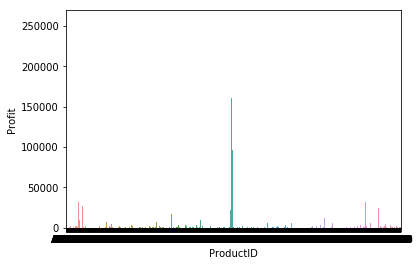

In [515]:
sns.barplot(x='ProductID',y='Profit', data=ProfitTable)

In [516]:
Sales.describe(include='all')

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,Profit
count,56199,56199.000000,56199,56199,56199.000000,56199.000000,56199,56199.000000,56199.000000,56199.000000,56199.000000
unique,6,NaN,26565,547,NaN,NaN,1724,NaN,NaN,NaN,NaN
top,4/30/2018,NaN,12:50:46,2ENA,NaN,NaN,A1826,NaN,NaN,NaN,NaN
freq,14107,NaN,14,791,NaN,NaN,910,NaN,NaN,NaN,NaN
mean,NaN,15.379384,NaN,NaN,11.405701,71.326999,NaN,200.580355,26.385487,127.770717,72.809637
std,NaN,8.591361,NaN,NaN,7.056722,44.316259,NaN,707.169783,79.239884,499.436184,238.151033
min,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000
25%,NaN,8.000000,NaN,NaN,5.000000,30.000000,NaN,12.566000,2.000000,6.413000,4.622500
50%,NaN,15.000000,NaN,NaN,12.000000,75.000000,NaN,56.598000,7.000000,34.334000,16.346000
75%,NaN,23.000000,NaN,NaN,16.000000,103.000000,NaN,138.960000,21.000000,83.023000,55.723000


In [517]:
SalesYear = Sales
SalesYear['Year'] = SalesYear['Date Consolidated'].str[-4:]
SalesYear.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,Profit,Year
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484,17.605,2018
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884,4.232,2018
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394,0.642,2018
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330,22.170,2018
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994,80.375,2018


In [518]:
YProfitTable = SalesYear.groupby(['Year','ProductID']).sum()
YProfitTable.head()

Day of Transaction  StoreID  EmployeeID     Amount  QTY  \
Year ProductID                                                            
2017 A10                        45       44         266    17.1510    3   
     A100                      507      289        1839  1005.6627  219   
     A1001                      72       65         391  1274.1640  490   
     A1003                     295      202        1279   255.3912   70   
     A1004                     378      301        1928   941.1105  274   

                   Cost     Profit  
Year ProductID                      
2017 A10         10.761     6.3900  
     A100       537.676   467.9867  
     A1001      244.530  1029.6340  
     A1003      131.589   123.8022  
     A1004      579.615   361.4955

In [519]:
YProfitTable['Year'] = YProfitTable.index.get_level_values('Year') 
YProfitTable['ProductID'] = YProfitTable.index.get_level_values('ProductID') 
YProfitTable.head()

Day of Transaction  StoreID  EmployeeID     Amount  QTY  \
Year ProductID                                                            
2017 A10                        45       44         266    17.1510    3   
     A100                      507      289        1839  1005.6627  219   
     A1001                      72       65         391  1274.1640  490   
     A1003                     295      202        1279   255.3912   70   
     A1004                     378      301        1928   941.1105  274   

                   Cost     Profit  Year ProductID  
Year ProductID                                      
2017 A10         10.761     6.3900  2017       A10  
     A100       537.676   467.9867  2017      A100  
     A1001      244.530  1029.6340  2017     A1001  
     A1003      131.589   123.8022  2017     A1003  
     A1004      579.615   361.4955  2017     A1004

In [520]:
YProfitTable = YProfitTable.drop(columns=['Day of Transaction', 'StoreID', 'EmployeeID'])
YProfitTable.reset_index(drop = True, inplace = True) 
YProfitTable.head()

,Amount,QTY,Cost,Profit,Year,ProductID
0,17.1510,3,10.761,6.3900,2017,A10
1,1005.6627,219,537.676,467.9867,2017,A100
2,1274.1640,490,244.530,1029.6340,2017,A1001
3,255.3912,70,131.589,123.8022,2017,A1003
4,941.1105,274,579.615,361.4955,2017,A1004


In [521]:
Profit2017 = YProfitTable.loc[YProfitTable['Year'] == '2017']
Profit2018 = YProfitTable.loc[YProfitTable['Year'] == '2018']
ProfitYears = Profit2017
ProfitYears = ProfitYears.join(Profit2018.set_index('ProductID'), on='ProductID', lsuffix=' 2017', rsuffix=' 2018')
#ProfitYears.info()
ProfitYears = ProfitYears.drop(columns=['Year 2017','Year 2018'])
ProfitYears = ProfitYears.fillna(0)
ProfitYears.head()

,Amount 2017,QTY 2017,Cost 2017,Profit 2017,ProductID,Amount 2018,QTY 2018,Cost 2018,Profit 2018
0,17.1510,3,10.761,6.3900,A10,31.423,4.0,22.030,9.393
1,1005.6627,219,537.676,467.9867,A100,795.966,152.0,384.158,411.808
2,1274.1640,490,244.530,1029.6340,A1001,1131.143,396.0,417.041,714.102
3,255.3912,70,131.589,123.8022,A1003,0.000,0.0,0.000,0.000
4,941.1105,274,579.615,361.4955,A1004,0.000,0.0,0.000,0.000


In [522]:
ProfitYears['QTY Increase'] = ProfitYears['QTY 2018'] - ProfitYears['QTY 2017']
ProfitYears['Profit Increase'] = ProfitYears['Profit 2018'] - ProfitYears['Profit 2017']
ProfitYears.head()

,Amount 2017,QTY 2017,Cost 2017,Profit 2017,ProductID,Amount 2018,QTY 2018,Cost 2018,Profit 2018,QTY Increase,Profit Increase
0,17.1510,3,10.761,6.3900,A10,31.423,4.0,22.030,9.393,1.0,3.0030
1,1005.6627,219,537.676,467.9867,A100,795.966,152.0,384.158,411.808,-67.0,-56.1787
2,1274.1640,490,244.530,1029.6340,A1001,1131.143,396.0,417.041,714.102,-94.0,-315.5320
3,255.3912,70,131.589,123.8022,A1003,0.000,0.0,0.000,0.000,-70.0,-123.8022
4,941.1105,274,579.615,361.4955,A1004,0.000,0.0,0.000,0.000,-274.0,-361.4955


In [523]:
ProfitYears.set_index('ProductID', inplace=True)
ProfitYears['ProductID'] = ProfitYears.index
ProfitYears.head()

,Amount 2017,QTY 2017,Cost 2017,Profit 2017,Amount 2018,QTY 2018,Cost 2018,Profit 2018,QTY Increase,Profit Increase,ProductID
ProductID,,,,,,,,,,,
A10,17.1510,3,10.761,6.3900,31.423,4.0,22.030,9.393,1.0,3.0030,A10
A100,1005.6627,219,537.676,467.9867,795.966,152.0,384.158,411.808,-67.0,-56.1787,A100
A1001,1274.1640,490,244.530,1029.6340,1131.143,396.0,417.041,714.102,-94.0,-315.5320,A1001
A1003,255.3912,70,131.589,123.8022,0.000,0.0,0.000,0.000,-70.0,-123.8022,A1003
A1004,941.1105,274,579.615,361.4955,0.000,0.0,0.000,0.000,-274.0,-361.4955,A1004


In [550]:
maxProductID = ProfitYears['Profit Increase'].argmin()
ProfitYears.loc[ProfitYears['ProductID'] == maxProductID]

/files1d/1438243/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


,Amount 2017,QTY 2017,Cost 2017,Profit 2017,Amount 2018,QTY 2018,Cost 2018,Profit 2018,QTY Increase,Profit Increase,ProductID
ProductID,,,,,,,,,,,
A801,612715.7259,66117,420471.88,192243.8459,192671.0751,16382.0,128353.179,64317.8961,-49735.0,-127925.9498,A801


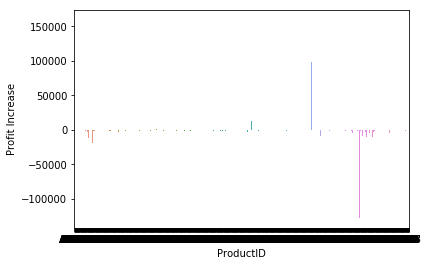

In [525]:
sns.barplot(x='ProductID',y='Profit Increase', data=ProfitYears)

In [526]:
FullData.head()

,Date Consolidated,Day of Transaction,Time of Transaction,CustomerID,StoreID,EmployeeID,ProductID,Amount,QTY,Cost,...,Customer Province,Age_Customer,Race,Income Bracket,Gender,Name,Age_Employee,Product Name,Latitude,Longitude
0,4/30/2018,16,15:24:31,2ELV,3,18,A1818,51.089,27,33.484,...,Western Cape,60,African,4,Female,Katia Tilman,45,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
1,4/30/2018,5,17:54:07,2EUA,3,9,A1818,8.116,4,3.884,...,Western Cape,81,African,2,Female,Kaila Mcdougall,30,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
2,4/30/2018,18,10:03:15,2HMJ,3,2,A1818,1.036,1,0.394,...,Western Cape,98,African,4,Male,Paul Blackburn,25,FABRIC REFRESHERS/DRY CLEAN - 11.5 OZ,-34.022660,18.657900
3,4/30/2018,7,10:03:15,7NBE,15,92,A1817,65.500,33,43.330,...,Mpumalanga,65,African,1,Male,Grisel Tomberlin,36,ORIENTAL SOY SAUCE - 16 OZ,-27.992459,26.775847
4,4/30/2018,11,12:45:28,2ETT,1,16,A1817,195.369,30,114.994,...,Western Cape,64,African,7,Female,Summer Dials,46,ORIENTAL SOY SAUCE - 16 OZ,-33.919628,18.385679


In [527]:
SalesCustomer = Sales.join(Customer.set_index('CustomerID'), on='CustomerID', rsuffix='_Customer')
CSeg = SalesCustomer.drop(columns=['Date Consolidated','Day of Transaction','Time of Transaction','EmployeeID'])
CSeg = CSeg.drop(columns=['ProductID','Year','Customer'])
CSeg.head()

,CustomerID,StoreID,Amount,QTY,Cost,Profit,Customer Province,Age,Race,Income Bracket,Gender
0,2ELV,3,51.089,27,33.484,17.605,Western Cape,60,African,25 001 - 35 000,Female
1,2EUA,3,8.116,4,3.884,4.232,Western Cape,81,African,15 001 - 20 000,Female
2,2HMJ,3,1.036,1,0.394,0.642,Western Cape,98,African,25 001 - 35 000,Male
3,7NBE,15,65.500,33,43.330,22.170,Mpumalanga,65,African,10 001 - 15 000,Male
4,2ETT,1,195.369,30,114.994,80.375,Western Cape,64,African,50 001+,Female


In [528]:
ProvinceC = CSeg.groupby(['Customer Province']).sum()
ProvinceC['Customer Province'] = ProvinceC.index.get_level_values('Customer Province')
ProvinceC.head()

,StoreID,Amount,QTY,Cost,Profit,Age,Customer Province
Customer Province,,,,,,,
Eastern Cape,50970,7.277666e+05,83645,451764.231,276002.3215,246146,Eastern Cape
Free State,71612,7.404143e+05,107535,482096.588,258317.7550,223200,Free State
Gauteng Central,52571,1.737980e+06,221137,1115537.586,622442.3465,583785,Gauteng Central
Gauteng East,124478,1.117429e+06,141484,728960.034,388469.2792,363847,Gauteng East
Gauteng South West,106973,7.420805e+05,99753,460578.633,281501.9142,276406,Gauteng South West


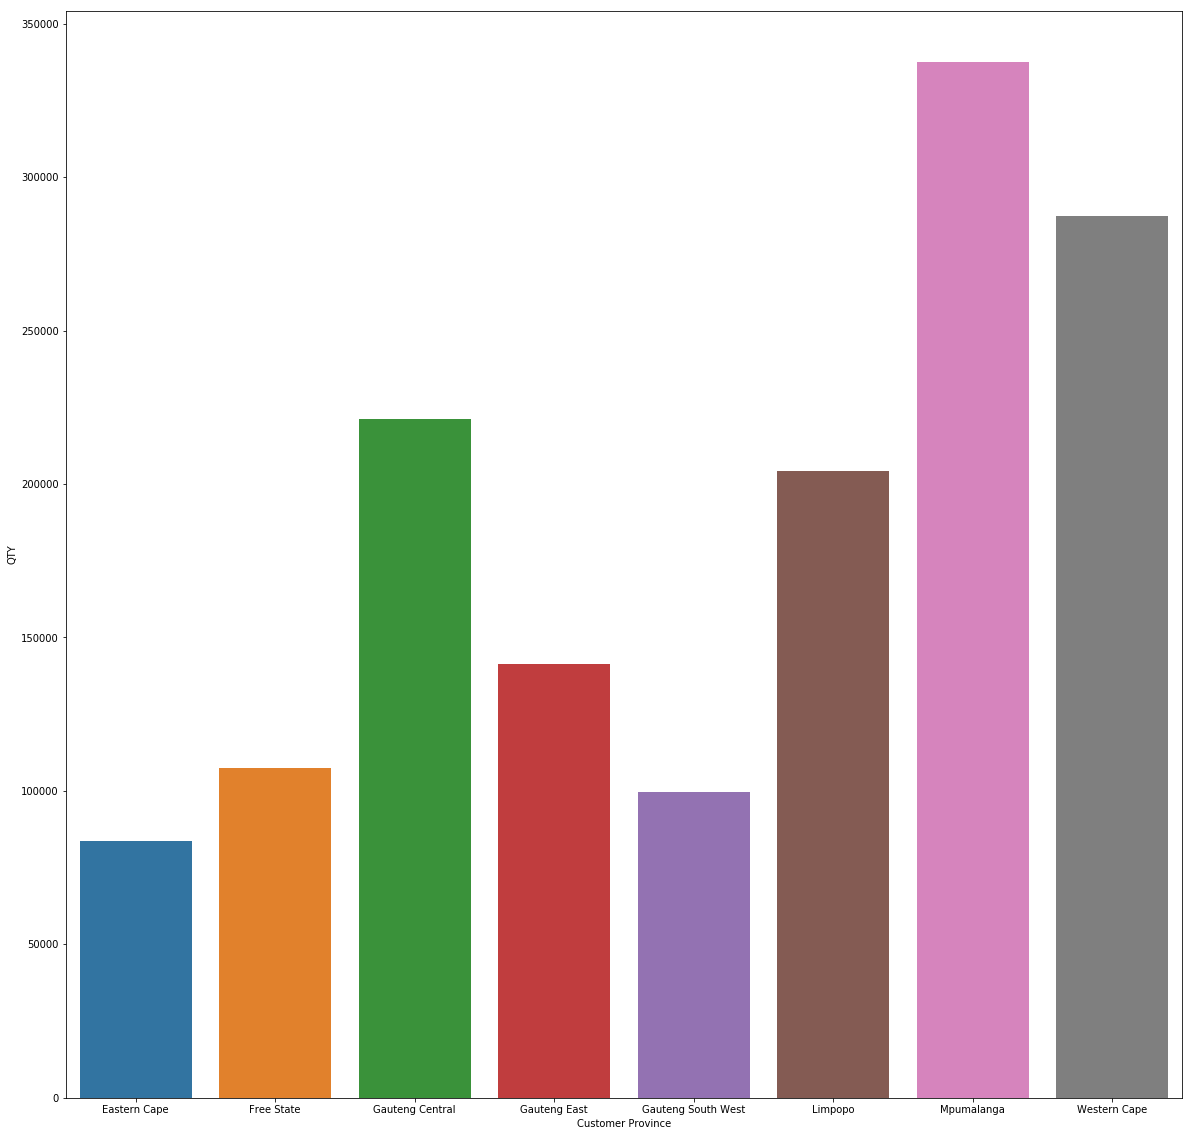

In [529]:
fig = plt.figure(figsize=(20,20))
sns.barplot(x='Customer Province',y='QTY',data=ProvinceC)

In [530]:
AgeC = CSeg.groupby(['Age']).sum()
AgeC['Age'] = AgeC.index
AgeC.head()

,StoreID,Amount,QTY,Cost,Profit,Age
Age,,,,,,
18,17978,197197.1798,29443,113763.810,83433.3698,18
19,8332,231543.9070,20030,160897.374,70646.5330,19
20,4227,121571.2075,11911,81611.844,39959.3635,20
21,7131,92227.9501,9548,61309.785,30918.1651,21
22,4976,166104.5722,21285,105808.371,60296.2012,22


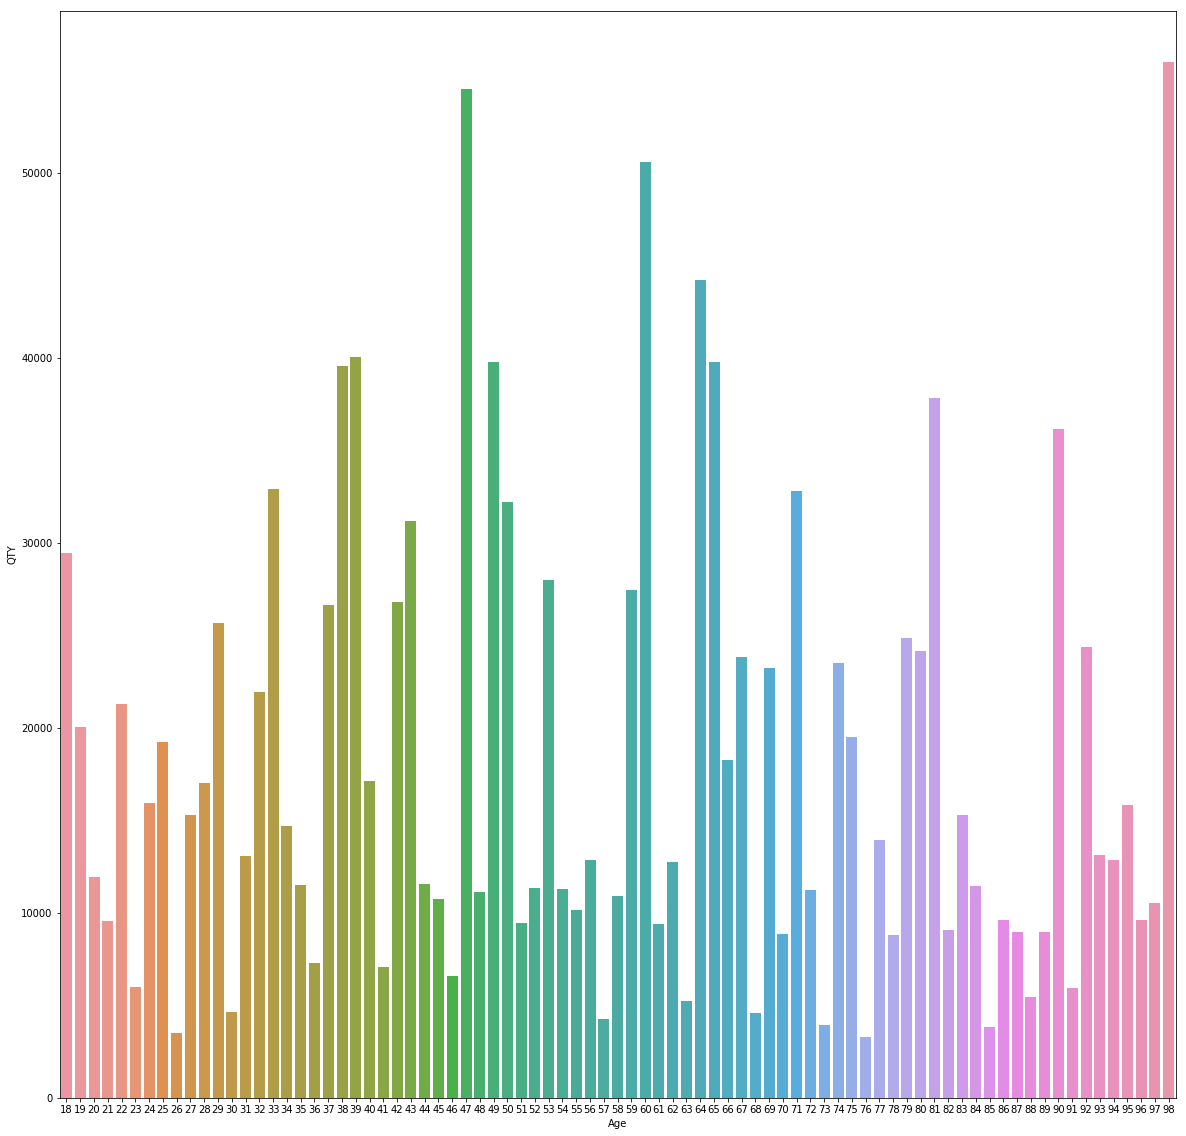

In [531]:
fig = plt.figure(figsize=(20,20))
sns.barplot(x='Age',y='QTY',data=AgeC)

In [532]:
RaceC = CSeg.groupby(['Race','Gender']).sum()
RaceC['Race'] = RaceC.index.get_level_values('Race')
RaceC['Gender'] = RaceC.index.get_level_values('Gender') 
RaceC.head()

StoreID        Amount     QTY         Cost        Profit  \
Race     Gender                                                             
African  Female   320597  5.556894e+06  734612  3490148.982  2.066745e+06   
         Male     170028  2.877219e+06  371933  1880661.950  9.965570e+05   
Asian    Female    15483  3.772857e+05   51257   245092.269  1.321934e+05   
         Male      11343  2.840054e+05   23513   192039.688  9.196575e+04   
Coloured Female    23762  6.335202e+05   82294   407951.530  2.255687e+05   

                     Age      Race  Gender  
Race     Gender                             
African  Female  1638967   African  Female  
         Male     847124   African    Male  
Asian    Female    95881     Asian  Female  
         Male      52315     Asian    Male  
Coloured Female   136284  Coloured  Female

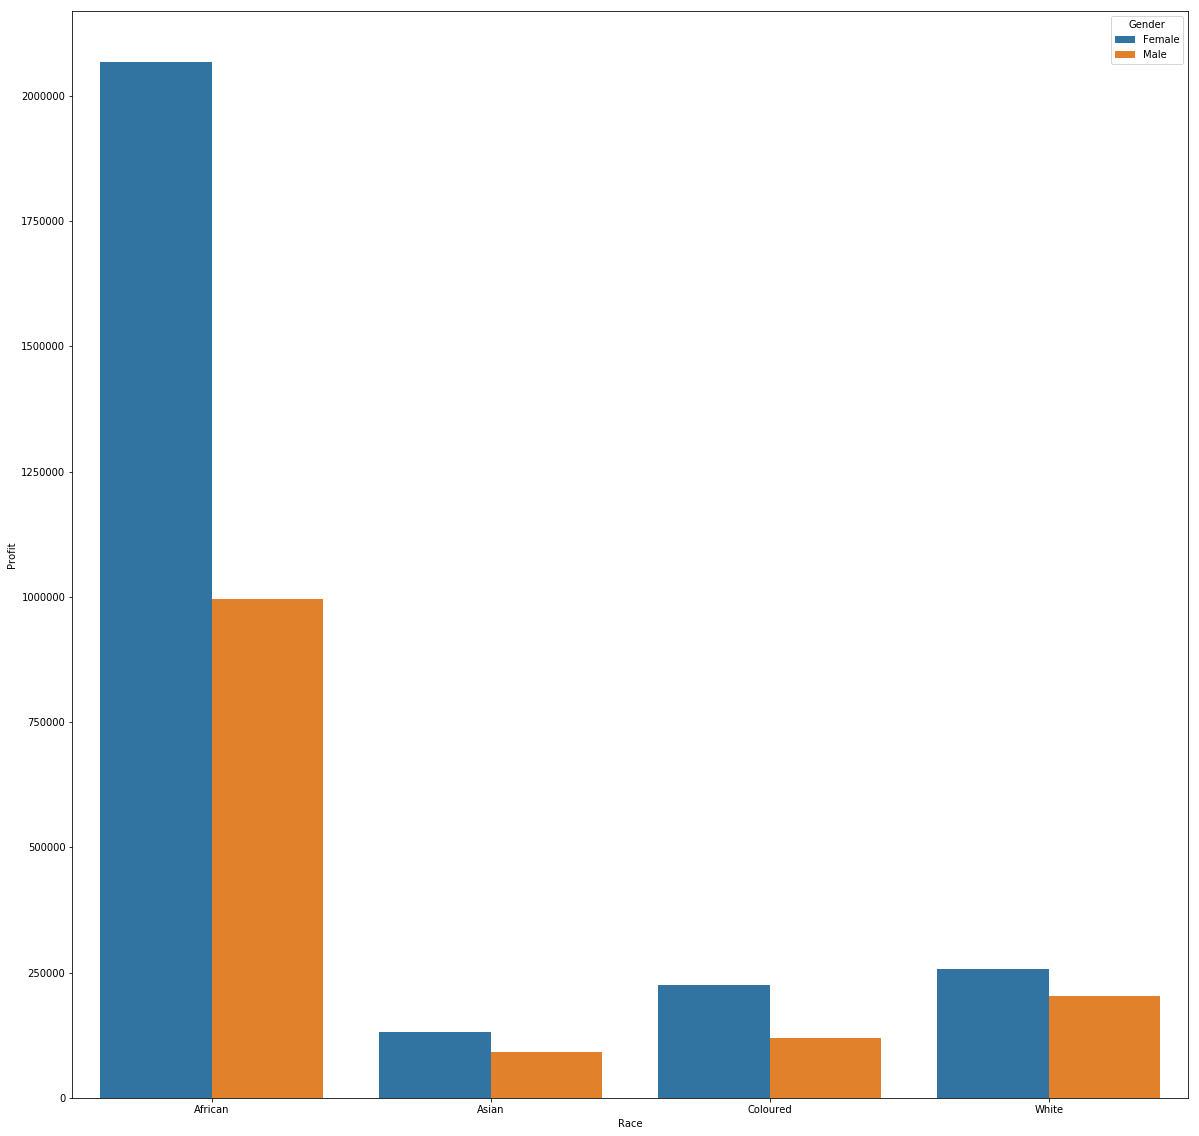

In [533]:
fig = plt.figure(figsize=(20,20))
sns.barplot(x='Race',y='Profit',data=RaceC, hue='Gender')

<h1>2 C</h1>

In [534]:
FullData['ProductID'].mode()

0    A1826
dtype: object

In [535]:
ChipData = FullData#.loc[FullData['ProductID'] == 'A1826']
ChipData.describe()

,Day of Transaction,StoreID,EmployeeID,Amount,QTY,Cost,Age_Customer,Income Bracket,Age_Employee,Latitude,Longitude
count,56199.000000,56199.000000,56199.000000,56199.000000,56199.000000,56199.000000,56199.000000,56199.000000,56199.000000,56199.000000,56199.000000
mean,15.379384,11.405701,71.326999,200.580355,26.385487,127.770717,57.518817,3.067190,38.703856,-28.316519,26.388676
std,8.591361,7.056722,44.316259,707.169783,79.239884,499.436184,23.348683,2.212003,9.396987,3.413715,3.700362
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,18.000000,0.000000,22.000000,-34.022660,18.385679
25%,8.000000,5.000000,30.000000,12.566000,2.000000,6.413000,38.000000,1.000000,31.000000,-29.150540,26.183994
50%,15.000000,12.000000,75.000000,56.598000,7.000000,34.334000,59.000000,3.000000,40.000000,-26.694580,27.811630
75%,23.000000,16.000000,103.000000,138.960000,21.000000,83.023000,78.000000,5.000000,46.000000,-26.196270,28.046110
max,31.000000,25.000000,150.000000,56074.762900,4912.000000,43134.433000,98.000000,7.000000,55.000000,-23.309560,30.978081


In [536]:
ChipData = ChipData.drop(columns=['Time of Transaction','CustomerID','StoreID','EmployeeID','Day of Transaction'])
ChipData = ChipData.drop(columns=['Product Name','Customer','Customer Province','Age_Customer','Race'])
ChipData = ChipData.drop(columns=['Income Bracket','Gender','Name','Age_Employee','Latitude','Longitude'])

In [537]:
ChipData.describe()

,Amount,QTY,Cost
count,56199.000000,56199.000000,56199.000000
mean,200.580355,26.385487,127.770717
std,707.169783,79.239884,499.436184
min,0.000000,1.000000,0.000000
25%,12.566000,2.000000,6.413000
50%,56.598000,7.000000,34.334000
75%,138.960000,21.000000,83.023000
max,56074.762900,4912.000000,43134.433000


In [538]:
Chips = ChipData.groupby(['Date Consolidated','ProductID']).sum()
Chips['Date Consolidated'] = Chips.index.get_level_values('Date Consolidated')
Chips['ProductID'] = Chips.index.get_level_values('ProductID') 

In [539]:
Chips.head()

Amount  QTY     Cost Date Consolidated  \
Date Consolidated ProductID                                             
2/28/2017         A100       294.8117   66  140.084         2/28/2017   
                  A1001      322.0530  147   73.430         2/28/2017   
                  A1003       23.8764   10    5.259         2/28/2017   
                  A1004      253.0502   78  161.538         2/28/2017   
                  A1005       39.1840   27   25.606         2/28/2017   

                            ProductID  
Date Consolidated ProductID            
2/28/2017         A100           A100  
                  A1001         A1001  
                  A1003         A1003  
                  A1004         A1004  
                  A1005         A1005

In [540]:
Chips['ProductID'].mode()

0    A1181
1    A1376
2     A393
dtype: object

In [541]:
Chips.loc[Chips['ProductID'] == 'A1181']

,,Amount,QTY,Cost,Date Consolidated,ProductID
Date Consolidated,ProductID,,,,,
2/28/2017,A1181,1732.6250,181,1127.960,2/28/2017,A1181
2/28/2018,A1181,94276.8237,12424,62327.661,2/28/2018,A1181
3/31/2017,A1181,1585.9790,170,1055.028,3/31/2017,A1181
3/31/2018,A1181,102347.5571,12879,59764.394,3/31/2018,A1181
4/30/2017,A1181,1795.7720,155,1212.195,4/30/2017,A1181
4/30/2018,A1181,2661.8752,182,1562.329,4/30/2018,A1181


<h1>Learn</h1>